# EDA Analysis

#### This file includes all the exploratory data analysis part.

## Importing the Neccessary Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the Dataset

In [63]:
df = pd.read_csv(r"D:\Autonomous Driving Deep Learning Project\data\tesla_cleaned.csv")
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla Driver,Tesla Occupant,Other Vehicle,...,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Link,News Link,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4,Month
0,294,2023,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,-,-,...,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN,1
1,293,2023,1/7/2023,Canada,-,Tesla crashes,1,1,-,-,...,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN,1
2,292,2023,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1,-,1,-,...,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN,1
3,291,2022,12/22/2022,USA,GA,Tesla crashes and burns,1,1,-,-,...,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN,12
4,290,2022,12/19/2022,Canada,-,Tesla crashes into storefront,1,-,-,-,...,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN,12


## Converting the Date Column Properly

In [64]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.day_name()
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla Driver,Tesla Occupant,Other Vehicle,...,News Link,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4,Month,Day,Day_of_Week
0,294,2023,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,-,-,...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN,1,17,Tuesday
1,293,2023,2023-01-07,Canada,-,Tesla crashes,1,1,-,-,...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN,1,7,Saturday
2,292,2023,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,-,1,-,...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN,1,7,Saturday
3,291,2022,2022-12-22,USA,GA,Tesla crashes and burns,1,1,-,-,...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN,12,22,Thursday
4,290,2022,2022-12-19,Canada,-,Tesla crashes into storefront,1,-,-,-,...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN,12,19,Monday


## Setting a Format for the Charts

In [65]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

## Making a file directory for saving the charts

In [66]:
os.makedirs("reports/figures", exist_ok=True)

## Line Graph for Number of Events by Year

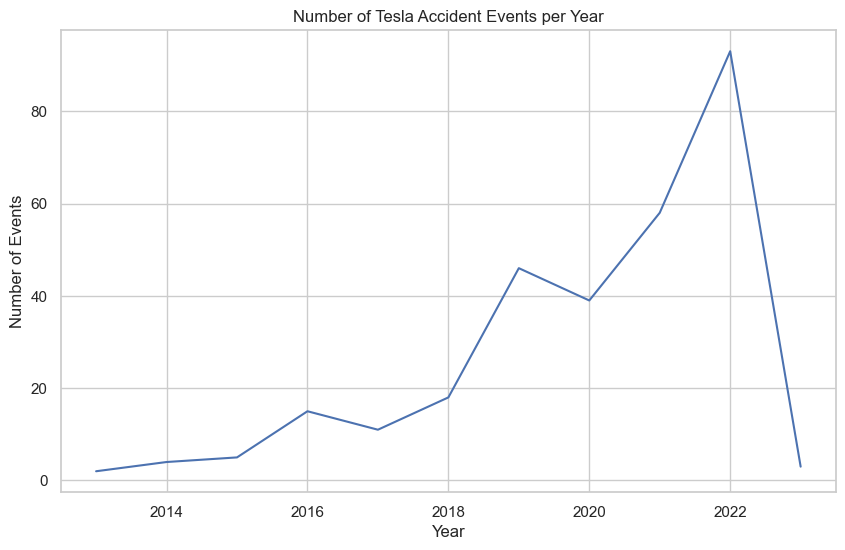

In [67]:
events_per_year = df['Year'].value_counts().sort_index()

plt.figure()
sns.lineplot(x=events_per_year.index, y=events_per_year.values)
plt.title("Number of Tesla Accident Events per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.savefig("reports/figures/Num of Events per Year.png", dpi=300, bbox_inches='tight')
plt.show()

## Bar Chart for Number of Events by Country

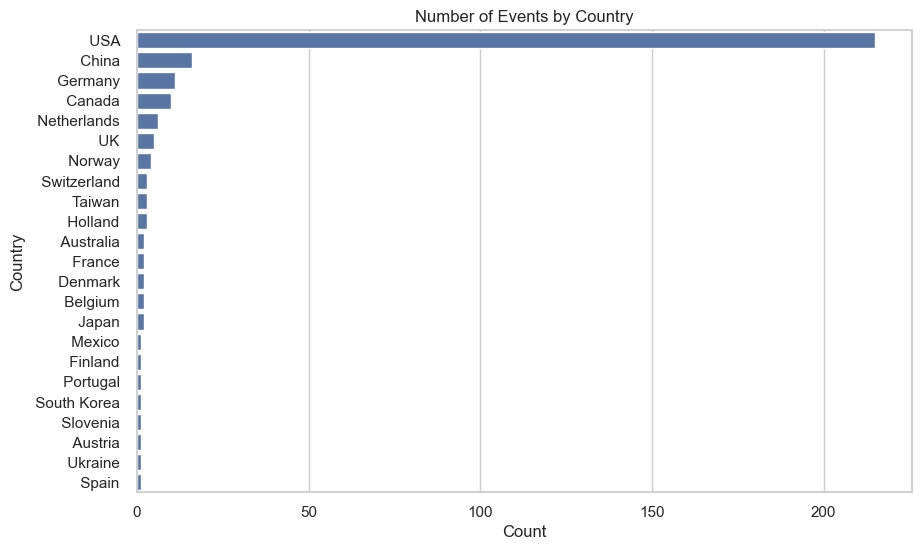

In [68]:
country_events = df[' Country '].value_counts()

plt.figure()
sns.barplot(x=country_events.values, y=country_events.index)
plt.title("Number of Events by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.savefig("reports/figures/Num of Events by Country.png", dpi=300, bbox_inches='tight')
plt.show()

## Bar Chart for Number of Events by State

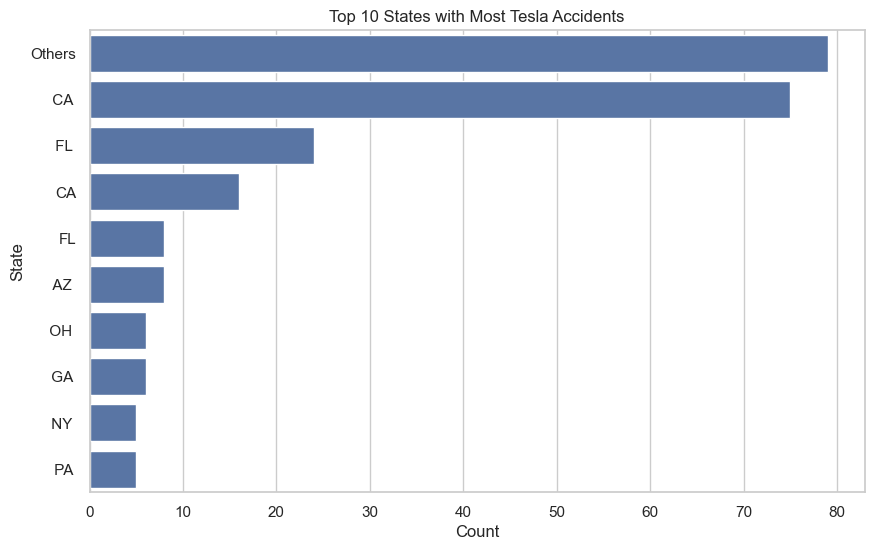

In [69]:
df[' State '] = df[' State '].replace('-', 'Others')
state_events = df[' State '].value_counts().head(10)

plt.figure()
sns.barplot(x=state_events.values, y=state_events.index)
plt.title("Top 10 States with Most Tesla Accidents")
plt.xlabel("Count")
plt.ylabel("State")
plt.savefig("reports/figures/Num of Events by State.png", dpi=300, bbox_inches='tight')
plt.show()

## Histogram for Distribution of Deaths per Accident

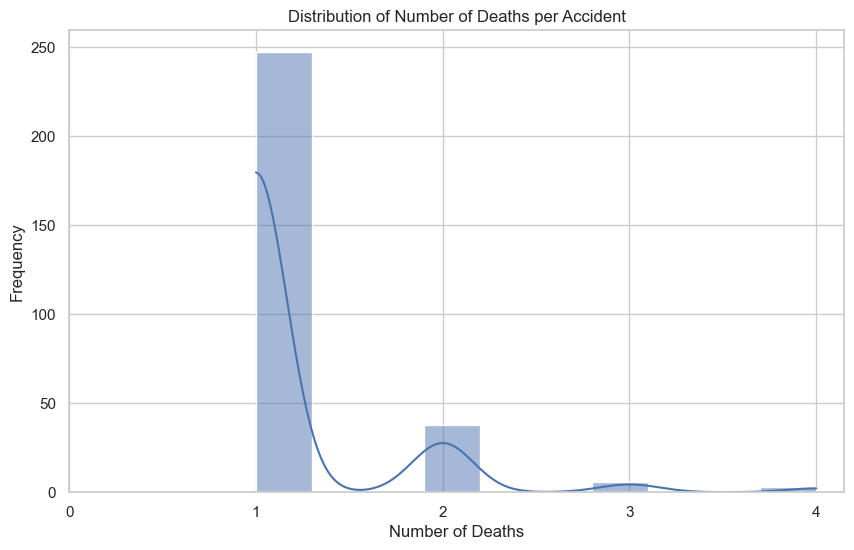

In [79]:
plt.figure()
sns.histplot(df[' Deaths '], bins=10, kde=True)
plt.title("Distribution of Number of Deaths per Accident")
plt.xlabel("Number of Deaths")
plt.xticks(range(0, int(df[' Deaths '].max()) + 1, 1))
plt.ylabel("Frequency")
plt.savefig("reports/figures/Distribution of Deaths per Accident.png", dpi=300, bbox_inches='tight')
plt.show()

## Total Tesla Driver Deaths

In [71]:
driver_deaths = df[' Tesla Driver ']
driver_deaths = pd.to_numeric(df[' Tesla Driver '], errors='coerce')
total_driver_deaths = driver_deaths.fillna(0).sum()

print("Total Tesla Driver Deaths:", int(total_driver_deaths))

Total Tesla Driver Deaths: 117


## Prportion of event with more than one death by total accidents

In [72]:
df[' Tesla Occupant '] = pd.to_numeric(df[' Tesla Occupant '], errors='coerce')
df[' Tesla Occupant '] = df[' Tesla Occupant '].fillna(0)
df['Occupant_Death'] = df[' Tesla Occupant '].apply(lambda x: 1 if x > 0 else 0)
df['Occupant_Death_Event'] = (df[' Tesla Occupant '] > 0).astype(int)
total_events = len(df)
death_events = df['Occupant_Death_Event'].sum()

proportion = death_events / total_events

print(f"Total events: {total_events}")
print(f"Events with occupant death: {death_events}")
print(f"Proportion: {proportion:.3f}")

Total events: 294
Events with occupant death: 43
Proportion: 0.146


## Number of accidents Involving Cyclists/Pedestrians

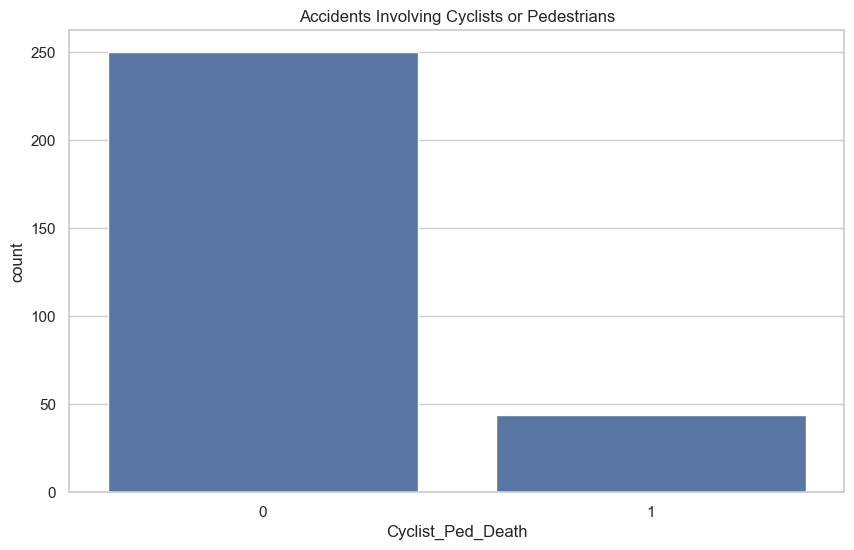

In [73]:
df[' Cyclists / Peds '] = pd.to_numeric(df[' Cyclists / Peds '], errors='coerce')
df['Cyclist_Ped_Death'] = df[' Cyclists / Peds '].apply(lambda x: 1 if x > 0 else 0)

sns.countplot(x='Cyclist_Ped_Death', data=df)
plt.title("Accidents Involving Cyclists or Pedestrians")
plt.savefig("reports/figures/Accidents Involving Cyclists & Pedestrians.png", dpi=300, bbox_inches='tight')
plt.show()

## Tesla Occupant/Driver + Cyclist/Pedestrian Death Together

In [74]:
df['Combined_Death'] = np.where(
    (df['Occupant_Death'] == 1) & (df['Cyclist_Ped_Death'] == 1),
    1, 0
)

combined_count = df['Combined_Death'].sum()

print("Number of accidents involving both Tesla occupant and cyclist/pedestrian death:", combined_count)


Number of accidents involving both Tesla occupant and cyclist/pedestrian death: 1


## Frequency of Tesla Colliding with Other Vehicles

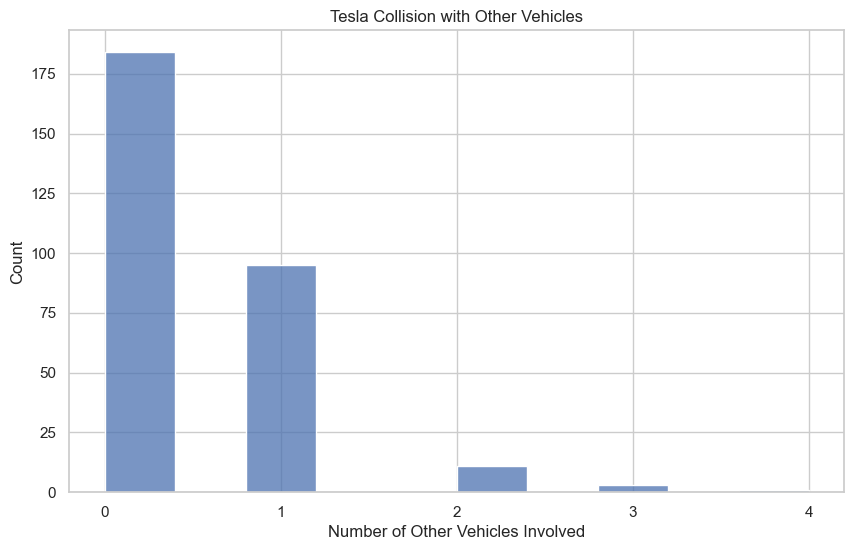

In [80]:
df[' Other Vehicle '] = df[' Other Vehicle '].replace('-', '0')
df[' Other Vehicle '] = pd.to_numeric(df[' Other Vehicle '], errors='coerce')
df[' Other Vehicle '] = df[' Other Vehicle '].fillna(0)

plt.figure()
sns.histplot(df[' Other Vehicle '], bins=10)
plt.title("Tesla Collision with Other Vehicles")
plt.xlabel("Number of Other Vehicles Involved")
plt.xticks(range(0, int(df[' Other Vehicle '].max()) + 1, 1))
plt.savefig("reports/figures/Frequency of Tesla Colliding with Other Vehicles.png", dpi=300, bbox_inches='tight')
plt.show()

## Distribution Across Tesla Models

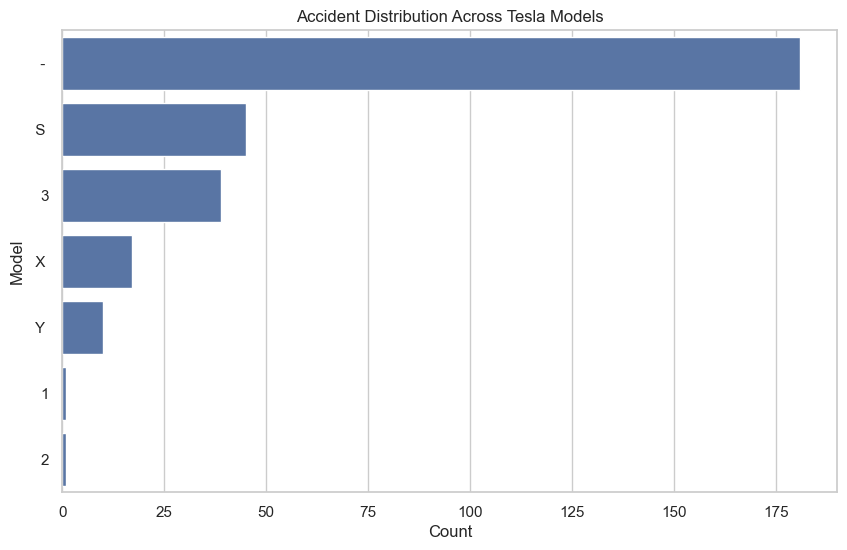

In [76]:
model_distribution = df[' Model '].value_counts()

plt.figure()
sns.barplot(x=model_distribution.values, y=model_distribution.index)
plt.title("Accident Distribution Across Tesla Models")
plt.xlabel("Count")
plt.ylabel("Model")
plt.savefig("reports/figures/Distribution Across Tesla Models.png", dpi=300, bbox_inches='tight')
plt.show()

## Distribution of Verified Tesla Autopilot Deaths

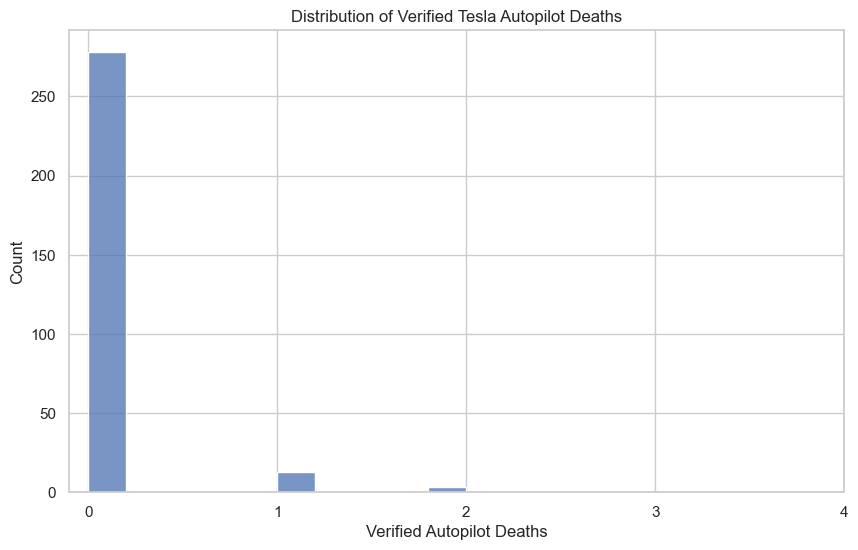

In [ ]:
df[' Verified Tesla Autopilot Deaths '] = pd.to_numeric(df[' Verified Tesla Autopilot Deaths '], errors='coerce')
df[' Verified Tesla Autopilot Deaths '] = df[' Verified Tesla Autopilot Deaths '].fillna(0)


plt.figure()
sns.histplot(df[' Verified Tesla Autopilot Deaths '], bins=10)
plt.title("Distribution of Verified Tesla Autopilot Deaths")
plt.xlabel("Verified Autopilot Deaths")
plt.xticks(range(0, int(df[' Other Vehicle '].max()) + 1, 1))
plt.savefig("reports/figures/Distribution of Verified Tesla Autopilot Deaths.png", dpi=300, bbox_inches='tight')
plt.show()

## Events by Day of Week

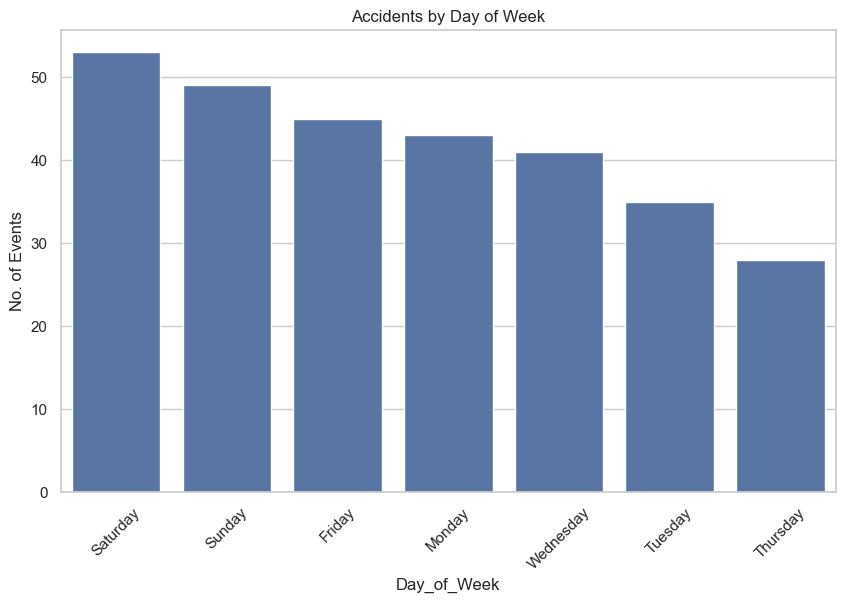

In [85]:
day_distribution = df['Day_of_Week'].value_counts()

plt.figure()
sns.barplot(x=day_distribution.index, y=day_distribution.values)
plt.xticks(rotation=45)
plt.title("Accidents by Day of Week")
plt.ylabel("No. of Events")
plt.savefig("reports/figures/Events by Day of Week.png", dpi=300, bbox_inches='tight')
plt.show()

## Correlation Heatmap

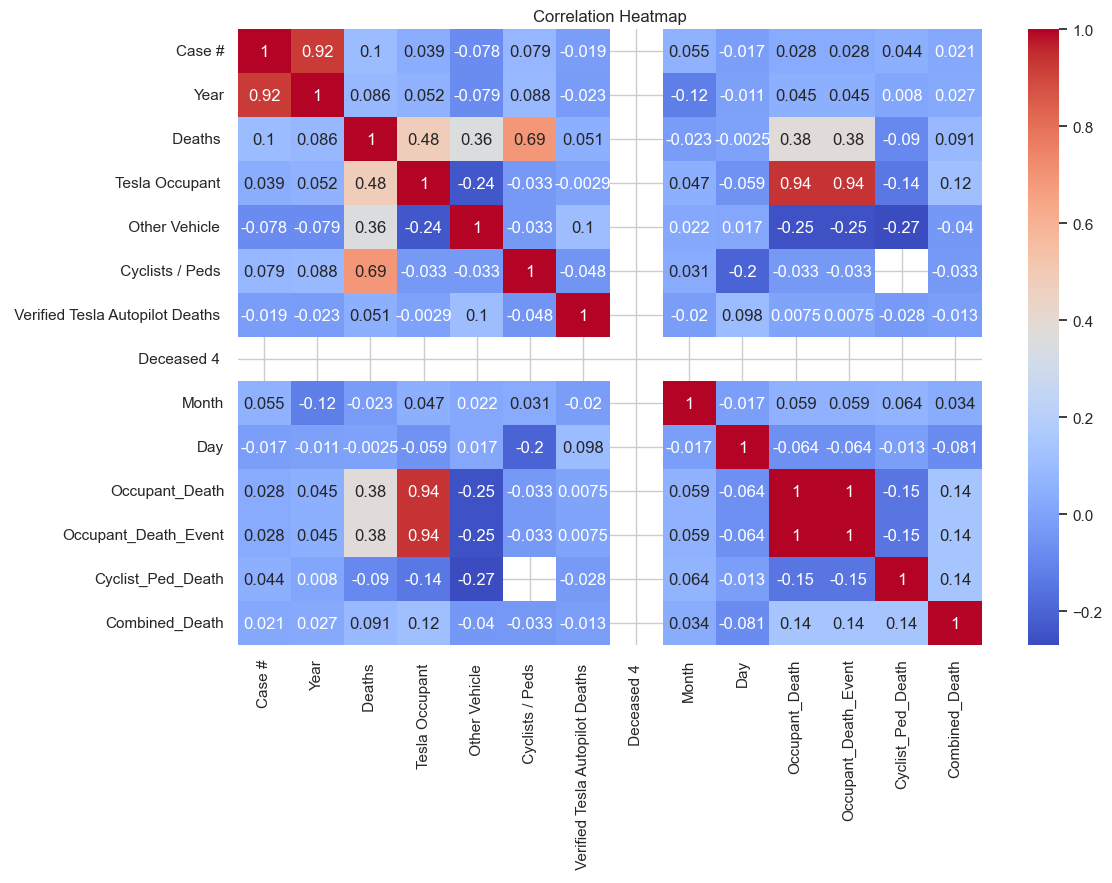

In [87]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("reports/figures/Correlation Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()